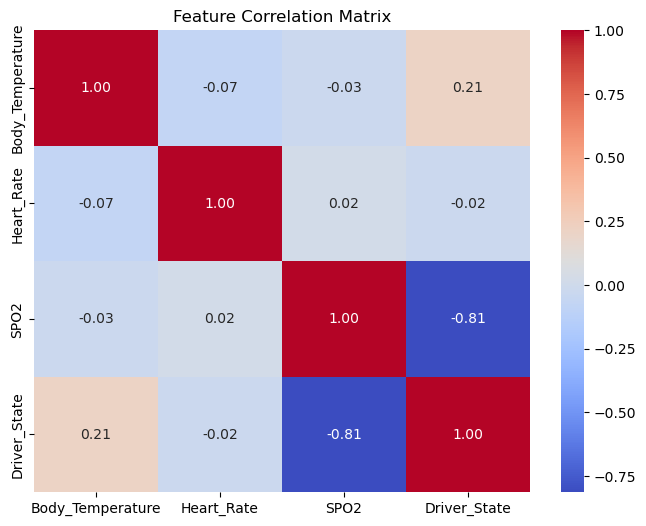

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'Emotional State.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features and target variable
X = data[['Body_Temperature', 'Heart_Rate', 'SPO2']]
y = data['Driver_State']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features for consistency
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

x_min, x_max = X['Body_Temperature'].min() - 1, X['Body_Temperature'].max() + 1
y_min, y_max = X['SPO2'].min() - 1, X['SPO2'].max() + 1

gx, gy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)



Kernel SVM Classifier
Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67        12
           2       0.00      0.00      0.00         3
           3       1.00      0.25      0.40         4
           4       0.00      0.00      0.00         7
           5       0.52      0.59      0.55        22
           6       0.49      0.73      0.59        33
           7       0.69      0.62      0.65        50
           8       0.67      0.40      0.50        25
           9       0.89      0.99      0.94        89

    accuracy                           0.71       246
   macro avg       0.49      0.42      0.43       246
weighted avg       0.69      0.71      0.69       246



c:\Users\lLOQ\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lLOQ\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lLOQ\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


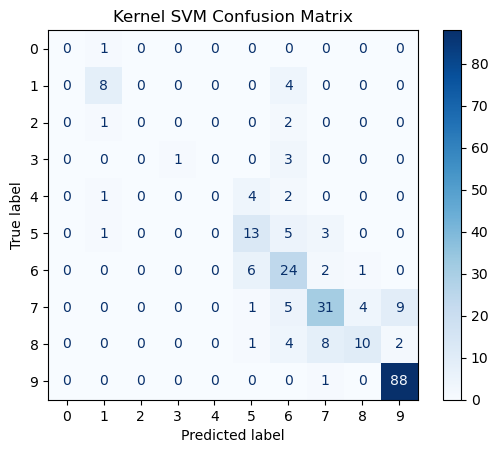

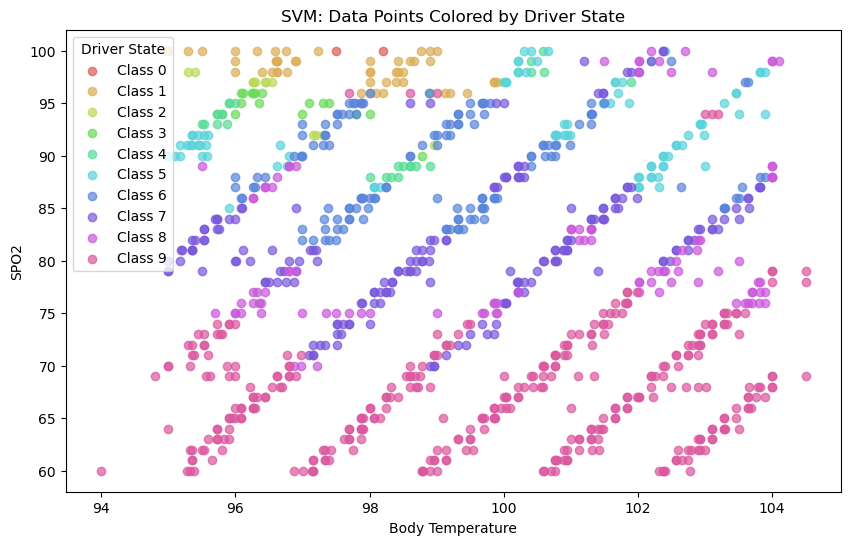

In [3]:
### Kernel SVM Classifier ###
print("Kernel SVM Classifier")
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)  # RBF kernel
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.2f}")
print(classification_report(y_test, svm_pred))
ConfusionMatrixDisplay.from_predictions(y_test, svm_pred, cmap="Blues")
plt.title("Kernel SVM Confusion Matrix")
plt.show()

# Dynamically create colors based on unique driver states
unique_states = np.unique(y_train)
colors = dict(zip(unique_states, sns.color_palette("hls", len(unique_states))))

# SVM Decision Boundary Plot
fig, ax = plt.subplots(figsize=(10, 6))
for label in unique_states:
    ax.scatter(
        X_train[y_train == label]['Body_Temperature'],
        X_train[y_train == label]['SPO2'],
        color=colors[label],
        label=f"Class {label}",
        alpha=0.7
    )
plt.xlabel("Body Temperature")
plt.ylabel("SPO2")
plt.legend(title="Driver State", loc="best")
plt.title("SVM: Data Points Colored by Driver State")
plt.show()



K-Nearest Neighbors (KNN) Classifier
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.73      0.67      0.70        12
           2       0.50      0.33      0.40         3
           3       1.00      0.25      0.40         4
           4       0.50      0.43      0.46         7
           5       0.53      0.41      0.46        22
           6       0.58      0.79      0.67        33
           7       0.64      0.64      0.64        50
           8       0.48      0.44      0.46        25
           9       0.93      0.96      0.94        89

    accuracy                           0.72       246
   macro avg       0.59      0.49      0.51       246
weighted avg       0.71      0.72      0.71       246



c:\Users\lLOQ\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lLOQ\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lLOQ\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


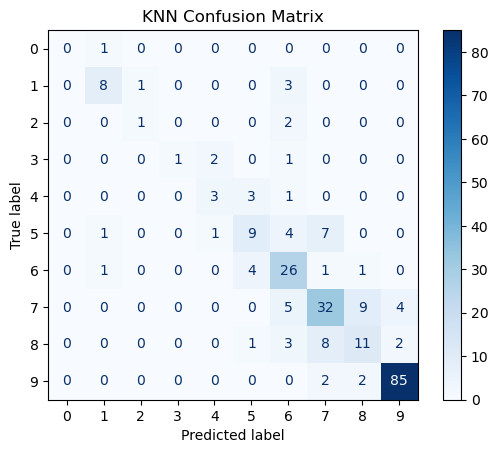

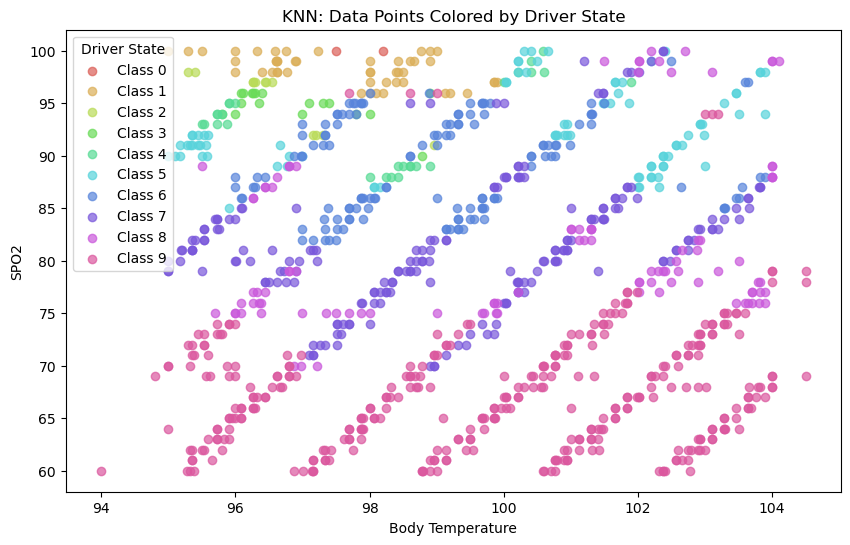

In [4]:
### K-Nearest Neighbors (KNN) Classifier ###
print("K-Nearest Neighbors (KNN) Classifier")
knn_model = KNeighborsClassifier(n_neighbors=5)  # K=5
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.2f}")
print(classification_report(y_test, knn_pred))
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()

# KNN Decision Boundary Plot
fig, ax = plt.subplots(figsize=(10, 6))
for label in unique_states:
    ax.scatter(
        X_train[y_train == label]['Body_Temperature'],
        X_train[y_train == label]['SPO2'],
        color=colors[label],
        label=f"Class {label}",
        alpha=0.7
    )
plt.xlabel("Body Temperature")
plt.ylabel("SPO2")
plt.legend(title="Driver State", loc="best")
plt.title("KNN: Data Points Colored by Driver State")
plt.show()

Decision Tree Classifier
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.92      1.00      0.96        12
           2       1.00      0.33      0.50         3
           3       1.00      0.75      0.86         4
           4       1.00      0.71      0.83         7
           5       0.85      0.77      0.81        22
           6       0.86      0.97      0.91        33
           7       0.92      0.94      0.93        50
           8       0.96      0.92      0.94        25
           9       0.98      1.00      0.99        89

    accuracy                           0.93       246
   macro avg       0.95      0.84      0.87       246
weighted avg       0.94      0.93      0.93       246



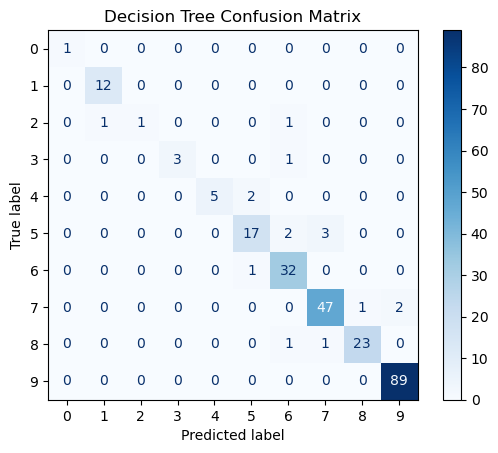

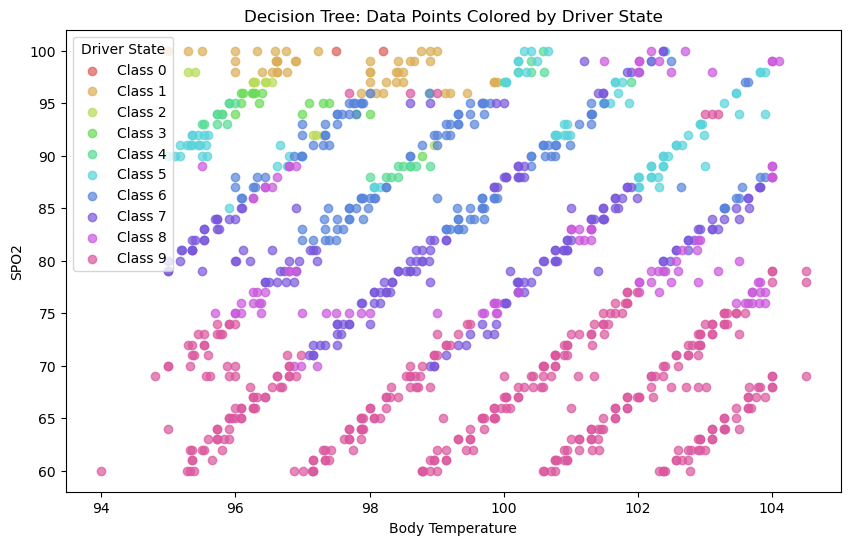

In [5]:

# Decision Tree Classifier
print("Decision Tree Classifier")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred = dt_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report_result)
ConfusionMatrixDisplay.from_estimator(dt_model, X_test_scaled, y_test, cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Decision Tree Decision Boundary Plot
fig, ax = plt.subplots(figsize=(10, 6))
for label in unique_states:
    ax.scatter(
        X_train[y_train == label]['Body_Temperature'],
        X_train[y_train == label]['SPO2'],
        color=colors[label],
        label=f"Class {label}",
        alpha=0.7
    )
plt.xlabel("Body Temperature")
plt.ylabel("SPO2")
plt.legend(title="Driver State", loc="best")
plt.title("Decision Tree: Data Points Colored by Driver State")
plt.show()



Random Forest Classifier
Accuracy: 0.94
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         3
           3       1.00      0.75      0.86         4
           4       1.00      0.71      0.83         7
           5       0.90      0.82      0.86        22
           6       0.92      1.00      0.96        33
           7       0.90      0.92      0.91        50
           8       0.96      0.88      0.92        25
           9       0.97      1.00      0.98        89

    accuracy                           0.94       246
   macro avg       0.96      0.91      0.93       246
weighted avg       0.94      0.94      0.94       246



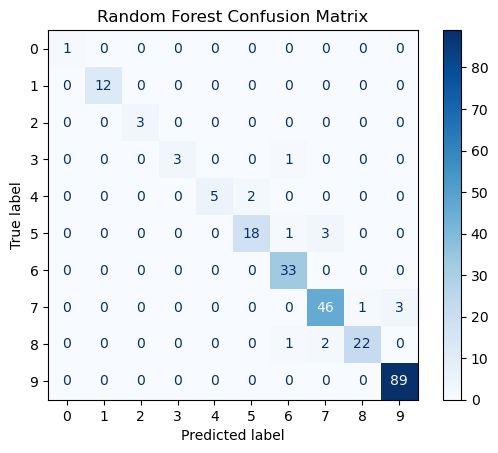

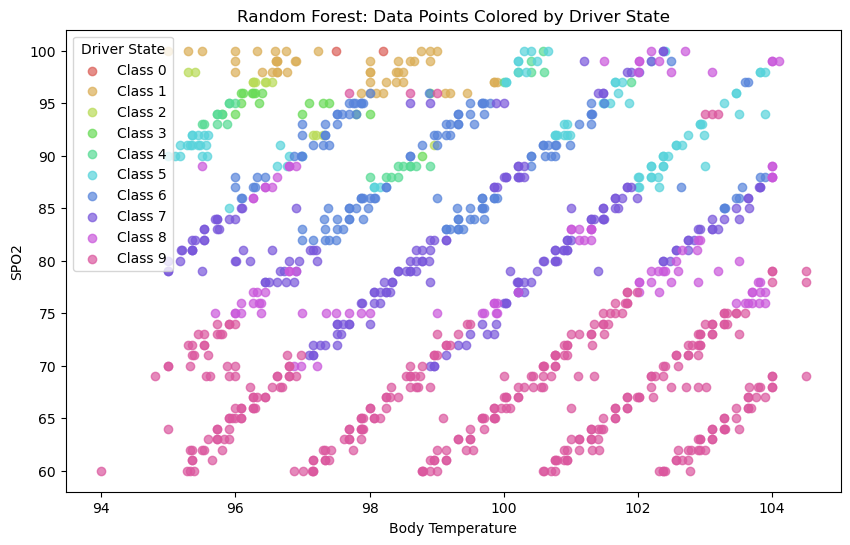

In [6]:

### Random Forest Classifier ###
print("Random Forest Classifier")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.2f}")
print(classification_report(y_test, rf_pred))
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Random Forest Decision Boundary Plot
fig, ax = plt.subplots(figsize=(10, 6))
for label in unique_states:
    ax.scatter(
        X_train[y_train == label]['Body_Temperature'],
        X_train[y_train == label]['SPO2'],
        color=colors[label],
        label=f"Class {label}",
        alpha=0.7
    )
plt.xlabel("Body Temperature")
plt.ylabel("SPO2")
plt.legend(title="Driver State", loc="best")
plt.title("Random Forest: Data Points Colored by Driver State")
plt.show()

c:\Users\lLOQ\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


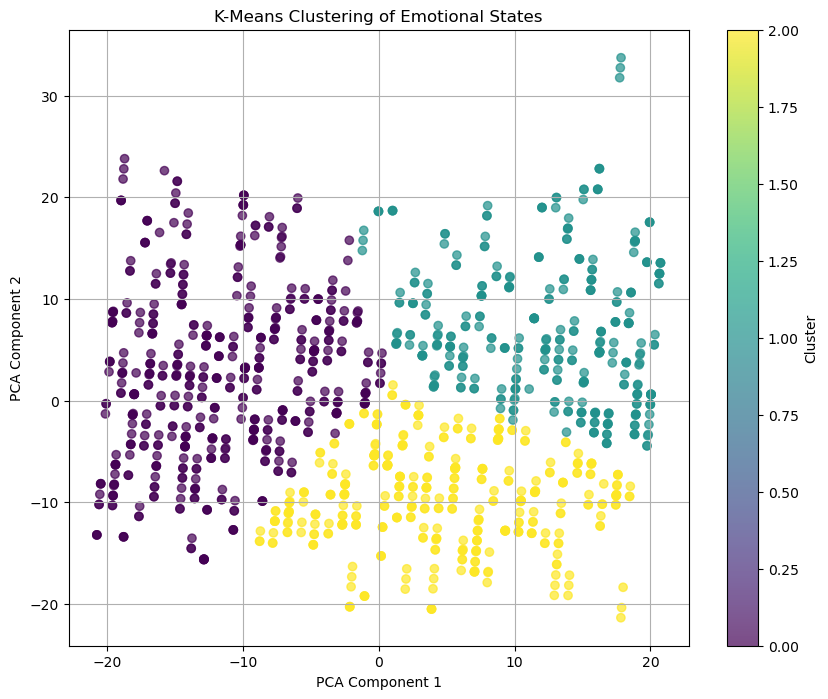

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA to reduce the features to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform K-Means clustering
n_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('K-Means Clustering of Emotional States')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()

In [8]:
# Example new sample input (replace with actual values)
sample_input = [[37, 100, 95]]  # Example: Body_Temperature, Heart_Rate, SPO2

# Standardize the sample input using the same scaler
sample_input_scaled = scaler.transform(sample_input)

# Predict the Driver_State using the trained model
predicted_state = rf_model.predict(sample_input_scaled)

print(f"The predicted Driver_State for the input {sample_input[0]} is: {predicted_state[0]}")

# Normal = 1-3
# Mild = 4-6
# Stressed = 7-8
# Risk = 9


The predicted Driver_State for the input [37, 100, 95] is: 7


c:\Users\lLOQ\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
